## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [131]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [132]:
# your code here
#model1 = nn.Sequential(OrderedDict([   ('hidden', nn.]))

model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 2)),
    ('sigmoid', nn.Sigmoid()),
    ('output', nn.Linear(2, 1)),
    ('sigmoid', nn.Sigmoid())
]))

model2 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 4)),
    ('sigmoid', nn.ReLU()),
    ('output', nn.Linear(4, 1)),
    ('sigmoid', nn.Sigmoid())
]))

model3 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 8)),
    ('sigmoid', nn.SELU()),
    ('output', nn.Linear(8, 16)),
    ('sigmoid', nn.SELU()),
    ('hidden', nn.Linear(2, 4)),
    ('sigmoid', nn.SELU()),
    ('output', nn.Linear(4,1)),
    ('sigmoid', nn.Sigmoid())
]))


In [133]:
print(model1)
print(model2)
print(model3)

Sequential(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=4, out_features=1, bias=True)
)
Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=4, out_features=1, bias=True)
)


In [134]:
# your code here

data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [135]:
# your code here
data_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
print(data_target)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [136]:
# your code here
criterion = nn.BCEWithLogitsLoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.3)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.1)

In [137]:
# your code here
# Train the model

print("Training model 1")
num_epochs = 10000
for epoch in range(num_epochs):
    output = model1(data_in)
    loss = criterion(output, data_target)
    print(output)
    loss.backward()
    optimizer1.step()
    optimizer1.zero_grad()
    
    if(epoch+1) %100 == 0:
        print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
        
print("Training model 2")
for epoch in range(num_epochs):
    output = model2(data_in)
    loss = criterion(output, data_target)
    print(output)
    loss.backward()
    optimizer2.step()
    optimizer2.zero_grad()
    
    if(epoch+1) %100 == 0:
        print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

print("Training model 3")
for epoch in range(num_epochs):
    output = model3(data_in)
    loss = criterion(output, data_target)
    print(output)
    loss.backward()
    optimizer3.step()
    optimizer3.zero_grad()
    
    if(epoch+1) %100 == 0:
        print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Training model 1
tensor([[-0.7977],
        [-0.8867],
        [-0.8311],
        [-0.9138]], grad_fn=<AddmmBackward0>)
tensor([[-0.6920],
        [-0.7685],
        [-0.7188],
        [-0.7902]], grad_fn=<AddmmBackward0>)
tensor([[-0.5992],
        [-0.6648],
        [-0.6205],
        [-0.6820]], grad_fn=<AddmmBackward0>)
tensor([[-0.5183],
        [-0.5743],
        [-0.5348],
        [-0.5875]], grad_fn=<AddmmBackward0>)
tensor([[-0.4480],
        [-0.4957],
        [-0.4602],
        [-0.5054]], grad_fn=<AddmmBackward0>)
tensor([[-0.3869],
        [-0.4274],
        [-0.3956],
        [-0.4342]], grad_fn=<AddmmBackward0>)
tensor([[-0.3341],
        [-0.3684],
        [-0.3397],
        [-0.3725]], grad_fn=<AddmmBackward0>)
tensor([[-0.2884],
        [-0.3173],
        [-0.2913],
        [-0.3193]], grad_fn=<AddmmBackward0>)
tensor([[-0.2490],
        [-0.2733],
        [-0.2496],
        [-0.2733]], grad_fn=<AddmmBackward0>)
tensor([[-0.2151],
        [-0.2352],
        [-0.2136],

Predictions for model 1
tensor([[0.],
        [0.],
        [1.],
        [0.]])


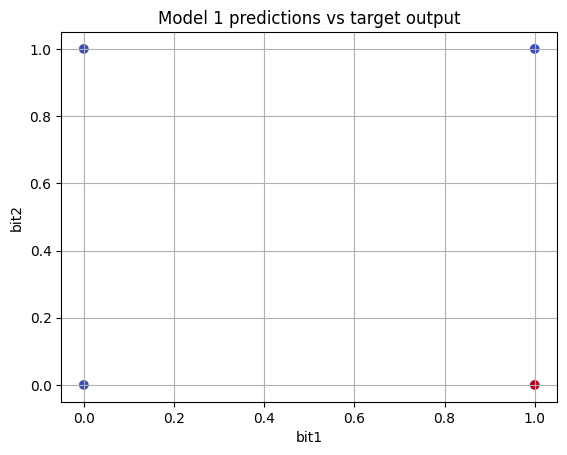

Predictions for model 2
tensor([[0.],
        [1.],
        [1.],
        [0.]])


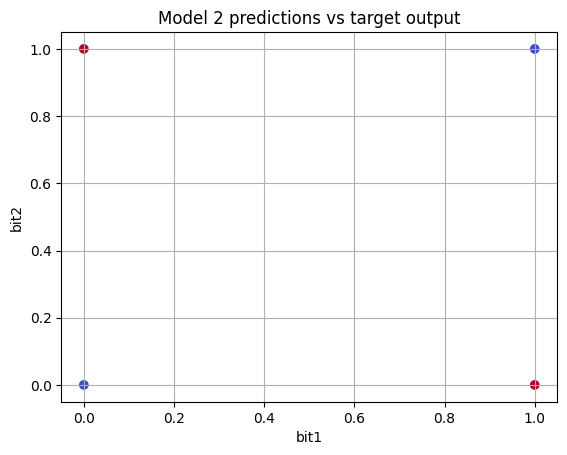

Predictions for model 3
tensor([[0.],
        [1.],
        [1.],
        [0.]])


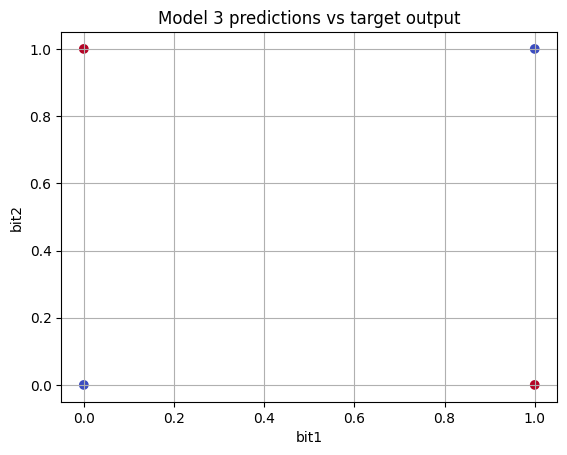

In [138]:
# your code here
# visualize the resuts
import matplotlib.pyplot as plt

# model 1
output = model1(data_in)
predictions = (output >= 0.5).float()
print("Predictions for model 1")
print(predictions)

fig, ax = plt.subplots()
ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap="coolwarm")
ax.set(xlabel='bit1', ylabel='bit2', title='Model 1 predictions vs target output')
ax.grid()
plt.show()


# model 2
output = model2(data_in)
predictions = (output >= 0.5).float()
print("Predictions for model 2")
print(predictions)

fig, ax = plt.subplots()
ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap="coolwarm")
ax.set(xlabel='bit1', ylabel='bit2', title='Model 2 predictions vs target output')
ax.grid()
plt.show()

# model 3
output = model3(data_in)
predictions = (output >= 0.5).float()
print("Predictions for model 3")
print(predictions)

fig, ax = plt.subplots()
ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap="coolwarm")
ax.set(xlabel='bit1', ylabel='bit2', title='Model 3 predictions vs target output')
ax.grid()
plt.show()

In [139]:
# your code here
accuracies = []
models = [model1, model2, model3]
for model in models:
    model.eval()
    with torch.no_grad():
        output = model(data_in)
        predictions = (output >= 0.5).float()
        accuracy = (predictions == data_target).float().mean()
        accuracies.append(accuracy)
    print("Accuracy " + ": {:.2f}%".format(accuracy.item()*100))
    
best_model = models[accuracies.index(max(accuracies))]
print("Best model is model " + str(models.index(best_model) + 1) + "\n")

for name, param in best_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Accuracy : 75.00%
Accuracy : 100.00%
Accuracy : 100.00%
Best model is model 2

hidden.weight tensor([[ 2.7456, -0.3881],
        [ 4.8937,  5.3134],
        [-5.2417,  6.8532],
        [ 5.9163, -2.7221]])
hidden.bias tensor([-0.7040, -1.0482,  2.2538,  0.2747])
output.weight tensor([[-2.0007,  8.6418, -7.9361, -6.7665]])
output.bias tensor([4.1021])
